In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential,layers

In [2]:
df=pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [4]:
df.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [5]:
df.shape

(9578, 14)

In [6]:
df1=pd.get_dummies(df,columns=['purpose'],dtype='int')
df1.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [7]:
df1.shape

(9578, 20)

In [9]:
df1.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

In [8]:
df1.dtypes

credit.policy                   int64
int.rate                      float64
installment                   float64
log.annual.inc                float64
dti                           float64
fico                            int64
days.with.cr.line             float64
revol.bal                       int64
revol.util                    float64
inq.last.6mths                  int64
delinq.2yrs                     int64
pub.rec                         int64
not.fully.paid                  int64
purpose_all_other               int32
purpose_credit_card             int32
purpose_debt_consolidation      int32
purpose_educational             int32
purpose_home_improvement        int32
purpose_major_purchase          int32
purpose_small_business          int32
dtype: object

In [10]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
cols=['days.with.cr.line','revol.bal', 'installment']
df1[cols]=m.fit_transform(df1[cols])
df1.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,0.879888,11.350407,19.48,737,0.312754,0.023898,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,0.229916,11.082143,14.29,707,0.147818,0.027848,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,0.379883,10.373491,11.63,682,0.259495,0.002908,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,0.158653,11.350407,8.10,712,0.144379,0.027885,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,0.094378,11.299732,14.97,667,0.222613,0.003926,39.5,0,1,0,0,0,1,0,0,0,0,0


In [13]:
x=df1.drop(['not.fully.paid'],axis=1)
y=df1['not.fully.paid']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
model=Sequential([
        layers.Dense(1,input_shape=(19,),activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10


C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8000 - loss: 4.2147
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7825 - loss: 0.7303
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8338 - loss: 0.4352
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8353 - loss: 0.4334
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8486 - loss: 0.4120
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8425 - loss: 0.4236
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8378 - loss: 0.4312
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8341 - loss: 0.4375
Epoch 9/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8383 - loss: 0.4275
Epoch 10/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8343 - loss: 0.4345


In [20]:
model.evaluate(x_test,y_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8507 - loss: 0.4049


[0.4183332026004791, 0.8397703766822815]

In [21]:
pred=model.predict(x_test)
pred

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.19799551],
       [0.1047428 ],
       [0.08132575],
       ...,
       [0.12397167],
       [0.07848341],
       [0.11157473]], dtype=float32)

In [22]:
y_pred=[]
for i in pred:
    if i<0.5:
        y_pred.append(0)
    else:
        y_pred.append(1)

In [23]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.38      0.01      0.02       305

    accuracy                           0.84      1916
   macro avg       0.61      0.50      0.47      1916
weighted avg       0.77      0.84      0.77      1916



In [25]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1606,    5],
       [ 302,    3]])>

Text(50.722222222222214, 0.5, 'truth')

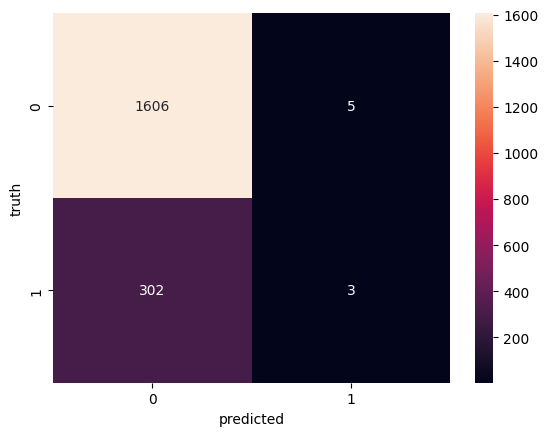

In [27]:
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')